<a href="https://colab.research.google.com/github/sarojkhanal-git/CBEAS-Project-Preprocessing/blob/Very_New_Codes/MNI_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import nibabel as nib
from glob import glob
import os
from matplotlib import pyplot as plt
from nibabel.processing import conform
from nibabel.orientations import aff2axcodes
import numpy as np

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def resampling(mni_images, mni_labels, img_out_dir, lbl_out_dir):

  for f, g in zip(mni_images, mni_labels):
    image = nib.load(f)
    label = nib.load(g)

    resampled_image = conform(image, out_shape=(256, 256, 256), order=0, cval=0.0, orientation='LIA', out_class=None)
    resampled_label = conform(label, out_shape=(256, 256, 256), order=0, cval=0.0, orientation='LIA', out_class=None)

    nib.save(resampled_image, os.path.join(img_out_dir, os.path.basename(f)))
    nib.save(resampled_label, os.path.join(lbl_out_dir, os.path.basename(g)))

    print(f"Resampled and saved: {os.path.basename(f), os.path.basename(g)}")


In [ ]:
mni_images = sorted(glob('/content/drive/MyDrive/MNI_train_data/Hires/image_files/*.nii.gz'))
mni_labels = sorted(glob('/content/drive/MyDrive/MNI_train_data/Hires/label_files_combined/*.nii.gz'))
img_out_dir = '/content/drive/MyDrive/MNI_train_data/Hires/Resampled/image_files'
lbl_out_dir = '/content/drive/MyDrive/MNI_train_data/Hires/Resampled/label_files'

os.makedirs(img_out_dir, exist_ok=True)
os.makedirs(lbl_out_dir, exist_ok=True)

#ref = nib.load('/content/drive/MyDrive/Datasets_for_model/resampled_image_directory/OAS30001_MR_d0757_T1w.nii.gz')

len(mni_images), len(mni_labels)

(25, 25)

In [ ]:
nib.load(mni_images[0]).shape, aff2axcodes(nib.load(mni_images[0]).affine)

((452, 542, 452), ('R', 'A', 'S'))

In [ ]:
resampling(mni_images, mni_labels, img_out_dir, lbl_out_dir)

Resampled and saved: ('s01_t1w_hires_defaced_MNI.nii.gz', 's01_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s02_t1w_hires_defaced_MNI.nii.gz', 's02_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s03_t1w_hires_defaced_MNI.nii.gz', 's03_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s04_t1w_hires_defaced_MNI.nii.gz', 's04_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s05_t1w_hires_defaced_MNI.nii.gz', 's05_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s06_t1w_hires_defaced_MNI.nii.gz', 's06_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s07_t1w_hires_defaced_MNI.nii.gz', 's07_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s08_t1w_hires_defaced_MNI.nii.gz', 's08_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s09_t1w_hires_defaced_MNI.nii.gz', 's09_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s10_t1w_hires_defaced_MNI.nii.gz', 's10_hippolabels_hres_L_MNI.nii.gz')
Resampled and saved: ('s11_t1w_hires_defaced_MNI.n

In [ ]:
mni_img_files = sorted(glob(f'{img_out_dir}/*.nii.gz'))
mni_lbl_files = sorted(glob(f'{lbl_out_dir}/*.nii.gz'))
len(mni_img_files), len(mni_lbl_files)

(25, 25)

In [ ]:
nib.load(mni_img_files[0]).shape, aff2axcodes(nib.load(mni_lbl_files[0]).affine), np.unique(nib.load(mni_lbl_files[0]).get_fdata())

((256, 256, 256), ('L', 'I', 'A'), array([0., 1.]))

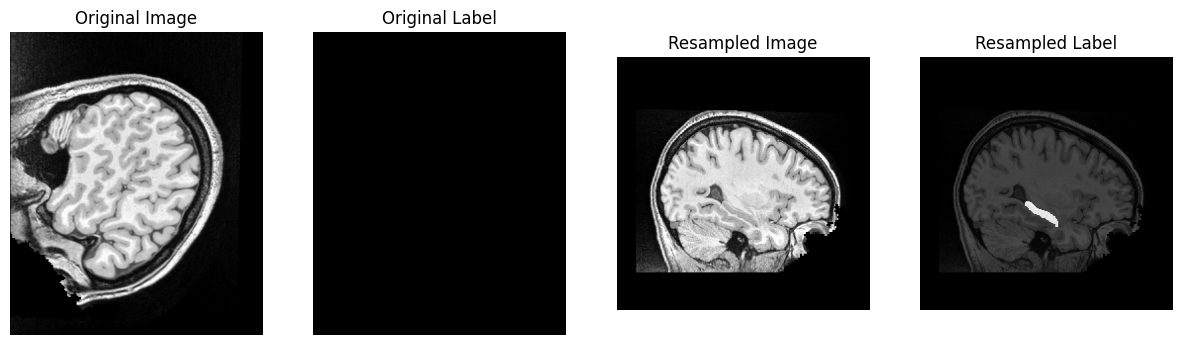

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (15, 5))

ax[0].imshow(nib.load(mni_images[0]).get_fdata()[98, :, :], cmap = 'gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(nib.load(mni_labels[0]).get_fdata()[98, :, :], cmap = 'gray')
ax[1].set_title('Original Label')
ax[1].axis('off')

ax[2].imshow(nib.load(mni_img_files[0]).get_fdata()[98, :, :], cmap = 'gray')
ax[2].set_title('Resampled Image')
ax[2].axis('off')

ax[3].imshow(nib.load(mni_lbl_files[0]).get_fdata()[98, :, :], cmap = 'gray')
ax[3].imshow(nib.load(mni_img_files[0]).get_fdata()[98, :, :], cmap = 'gray', alpha = 0.3)
ax[3].set_title('Resampled Label')
ax[3].axis('off')

plt.show()